In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats


In [119]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42

In [136]:
joined2=joined2.dropna()

In [142]:
joined2

,wt_10_TS,wt_10_NTS,wt_20_TS,wt_20_NTS,wt_30_TS,wt_30_NTS,wt_40_TS,wt_40_NTS,mfd_10_TS,mfd_10_NTS,...,bm01_TS,bm02_TS,bm03_TS,bm04_TS,bm05_TS,bm01_NTS,bm02_NTS,bm03_NTS,bm04_NTS,bm05_NTS
gene,,,,,,,,,,,,,,,,,,,,,
thrA,0.241522,0.020467,0.483275,0.317827,0.598393,0.493800,0.609292,0.546130,0.146740,0.111925,...,607.231478,295.854780,541.385104,123.609930,228.262963,10.572401,7.666203,11.610379,7.210579,6.297599
thrB,0.278833,NaN,0.512750,0.077537,0.701453,0.490411,0.668000,0.410701,0.222318,0.214997,...,384.081094,236.264903,382.389509,65.073125,61.966644,7.179701,6.063942,7.693092,5.753180,4.180988
thrC,0.198214,0.120130,0.636599,0.306762,0.618960,0.495662,0.648352,0.613420,0.109375,0.132604,...,428.105130,302.239786,456.088236,79.980948,71.190895,4.821434,6.202342,6.033852,10.029312,8.659645
yaaA,0.180754,0.167100,0.613239,0.462606,0.700985,0.707630,0.672611,0.672611,0.081261,0.144130,...,56.062968,31.000767,53.256605,38.447137,31.318277,6.144248,1.978772,5.906508,13.842837,17.998099
yaaJ,0.045539,0.184196,0.442389,0.371300,0.473095,0.601523,0.565177,0.685542,0.201240,0.085054,...,5.251756,4.832079,5.931633,7.043214,7.730258,3.835070,2.788885,3.657397,30.769724,27.937925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
creA,0.446602,0.166869,0.626316,0.368107,0.571610,0.516846,0.539488,0.670392,0.149858,0.186326,...,31.408705,16.637585,26.014687,51.203824,51.250437,0.908516,0.856678,0.643331,10.838207,13.528034
creB,0.254938,0.169117,0.547764,0.301541,0.758277,0.582625,0.647348,0.578115,0.276069,0.195123,...,10.632572,5.169188,8.501723,19.140104,13.394747,0.207899,0.309532,0.303633,2.313639,2.232458
creC,0.220812,0.028150,0.396068,0.308501,0.605716,0.426726,0.661664,0.541656,0.053046,0.124759,...,12.890121,5.271786,12.995061,25.276679,20.393628,1.350804,0.868646,0.961608,3.752703,4.608730


In [149]:
# dataframe with percent change values at each timepoint
pc_df=pd.read_csv('2020-07-13_CPDseq/pc_df_TTgreaterthan5',index_col=0)
pc_df=pc_df[pc_df>0]
# RNA-Seq RPKMs
TS_rpkm=pd.read_csv('2018-05-22_RNAseq/TS_rpkm.csv',index_col=0)
NTS_rpkm=pd.read_csv('2018-05-22_RNAseq/NTS_rpkm.csv',index_col=0)
# combine all data into one dataframe
joined1=pc_df.join(TS_rpkm)
joined2=joined1.join(NTS_rpkm)

1.266368158170354e-40


Text(0, 0.5, 'log2(TS/NTS Repair)')

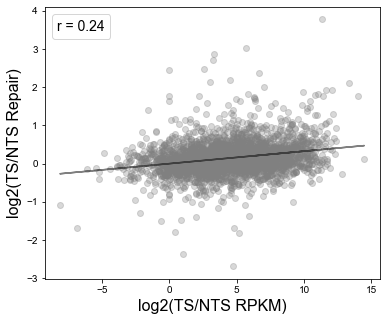

In [153]:
# TS/NTS transcription vs WT repair (20 minutes) 60J
ratio_df=pd.DataFrame()
ratio_df['TS/NTS']=joined2['bm10_TS']/joined2['bm10_NTS']
ratio_df['TS/NTS_pc']=joined2['rho15_30_TS']/joined2['rho15_30_NTS']
ratio_df=ratio_df.dropna()
x=np.log2(ratio_df['TS/NTS'].tolist())
y=np.log2(ratio_df['TS/NTS_pc'].tolist())
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)          
print(p)
fig, ax= plt.subplots(figsize=(6,5))

ax.plot(x, y,linewidth=0,marker='o',c='grey',alpha=0.3)
ax.plot(x, intercept + slope * x,label=f'r = {r:.2f}',c='black',alpha=0.5)
#ax.legend(facecolor='white',fontsize=14)


leg = ax.legend(handlelength=0, handletextpad=0,fontsize=14, fancybox=True)
for item in leg.legendHandles:
    item.set_visible(False)
ax.set_xlabel('log2(TS/NTS RPKM)',fontname="Arial", fontsize=16)
ax.set_ylabel('log2(TS/NTS Repair)', fontname="Arial", fontsize=16)
#plt.savefig("mfd_corr_20min.pdf",bbox_inches='tight')

Text(0, 0.5, 'log2(TS/NTS Repair)')

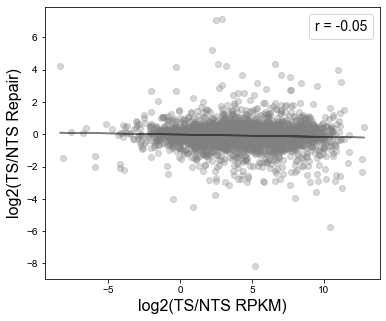

In [76]:
# TS/NTS transcription vs mfd repair (20 minutes) 60J 
ratio_df=pd.DataFrame()
ratio_df['TS/NTS']=joined2['bm04_TS']/joined2['bm04_NTS']
ratio_df['TS/NTS_pc']=joined2['mfd-p_20_TS']/joined2['mfd-p_20_NTS']
ratio_df=ratio_df.dropna()
x=np.log2(ratio_df['TS/NTS'].tolist())
y=np.log2(ratio_df['TS/NTS_pc'].tolist())
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)          

fig, ax= plt.subplots(figsize=(6,5))

ax.plot(x, y,linewidth=0,marker='o',c='grey',alpha=0.3)
ax.plot(x, intercept + slope * x,label=f'r = {r:.2f}',c='black',alpha=0.5)
#ax.legend(facecolor='white',fontsize=14)


leg = ax.legend(handlelength=0, handletextpad=0,fontsize=14, fancybox=True)
for item in leg.legendHandles:
    item.set_visible(False)
ax.set_xlabel('log2(TS/NTS RPKM)',fontname="Arial", fontsize=16)
ax.set_ylabel('log2(TS/NTS Repair)', fontname="Arial", fontsize=16)
#plt.savefig("mfd_corr_20min.pdf",bbox_inches='tight')

In [94]:
p

1.7484264331577945e-125

In [103]:
np.log2(0.8)

-0.3219280948873623